In [16]:
from os import listdir

def fileids(path):
    fileList = list()
    
    path = path + ('' if path[-1] == '/' else '/')
    
    for f in listdir(path):
        if f.endswith('.txt'):
            fileList.append(path+f)
            
    return fileList

In [5]:
# with open(fileids('news')[0], 'r', encoding='utf8') as fp:
#     d = fp.read()

In [17]:
import re

p1 = re.compile('[a-zA-Z0-9_-]+@(?:[.]?[a-zA-Z0-9_-]+)+')
p2 = re.compile('[{}]'.format(re.escape('''"'=ㆍⓒ'"''')))
p3 = re.compile('[\(\[].+?[\)\]]')
p4 = re.compile('[a-zA-Z]+')
p5 = re.compile('\s+')
# p5.sub(' ', p4.sub(' ', p3.sub(' ', p2.sub(' ', p1.sub(' ', d))))).strip()

In [18]:
corpus = list()

for f in fileids('news'):
    with open(f, 'r', encoding='utf8') as fp:
        corpus.append(p5.sub(' ', 
                    p4.sub(' ', 
                    p3.sub(' ', 
                    p2.sub(' ', 
                    p1.sub(' ', fp.read()))))).strip())

In [19]:
from nltk.tokenize import word_tokenize
from collections import Counter


tokens = Counter(word_tokenize('\n'.join(corpus)))

In [20]:
tokens

Counter({'올해': 45,
         '여름부터는': 1,
         '코로나19로': 4,
         '확진자': 4,
         '격리와': 1,
         '실내마스크': 1,
         '의무': 9,
         '조치가': 4,
         '모두': 48,
         '해제될': 1,
         '전망입니다.코로나19': 1,
         '중앙재난안전대책본부는': 1,
         '오늘': 32,
         '방역': 11,
         '의료체계의': 1,
         '일상': 4,
         '회복을': 1,
         '추진하는': 2,
         '내용의': 8,
         '코로나19': 22,
         '위기단계': 1,
         '조정': 6,
         '로드맵': 2,
         '을': 86,
         '발표했습니다.이번': 1,
         '로드맵에': 1,
         '따르면': 86,
         '엔데믹까지': 1,
         '3단계에': 1,
         '걸쳐': 10,
         '회복이': 1,
         '추진될': 1,
         '예정입니다.현재': 1,
         '심각': 8,
         '인': 12,
         '위기': 15,
         '단계가': 1,
         '경계': 2,
         '수준으로': 7,
         '하향되는': 1,
         '1단계': 2,
         '시점은': 1,
         '4월': 26,
         '말~5월': 1,
         '초로': 1,
         '예상되는데': 1,
         '미국의': 17,
         '비상사태': 1,
         '종료': 2,
         '시점과': 1,
      

In [12]:
from math import log


BE = lambda n1, n2: -(n1/n2)*log(n1/n2)   # -p * log p


In [13]:
BE(1, 100000), BE(100000, 100000), BE(1,2)

(0.0001151292546497023, -0.0, 0.34657359027997264)

In [22]:
tokenList = lambda t: {k: v for k,v in tokens.items() if re.match(t,k)}

In [67]:
from collections import defaultdict

# 대표
q = '애플스토어에서'
beList = list()
for i in range(len(q)):
    
    candidates = defaultdict(int)
    for k,v in tokenList(q[:i+1]).items():
        candidates[k[:len(q[:i+1])+1]] += v
    
    be = 0
    for k,v in candidates.items():
        e = BE(v, sum(tokenList(q[:i+1]).values()))
        be += e
#         print('{} - {:3f}'.format(k,e))
        
    beList.append(be)
    
    
for i in range(2, len(beList)):    # 1음절 제거하려고 range 2로 시작함
    if beList[i-1] < beList[i]:    # 2번째 음절 be 와 3번째 음절 be 비교
        print(q[:i], 'True')
    elif beList[i-1] > beList[i]:
        print(q[:i], 'True')
    else:
        print(q[:i], 'False')
    
beList
# sum(tokenList('대').values()), candidates

# 대표 : 
# 대표는 : 0

애플 True
애플스 False
애플스토 True
애플스토어 True
애플스토어에 False


[1.2097172220557906, 1.8205141933946285, 0.0, 0.0, 1.0114042647073518, 0, 0]

In [63]:
import matplotlib.pyplot as plt

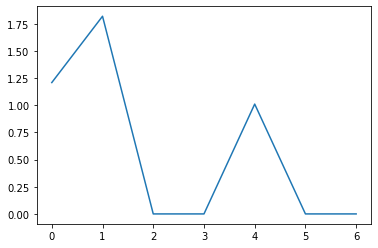

In [68]:
plt.plot(beList)

In [72]:
CS = lambda n1, n2, n3: (n1/n2)**(1/n3)

In [80]:
# Cohesion Score = Perplexity 응집도... 얼마나 가까이 뭉쳐있는지 보자

q = '애플스토어를'


n1 = tokens[q]
n2 = sum(tokenList(q[:1]).values())
n3 = len(q)

CS(n1, n2, n3), n1, n2, n3

(0.4885984783987274, 2, 147, 6)

In [ ]:
애플스토어       (0.45915654995943406, 3, 147, 5)
애플스토어를     (0.4885984783987274, 2, 147, 6)
애플스토어에     (0.0, 0, 147, 6)
애플스토어가     (0.0, 0, 147, 6)
애플스토어의     (0.0, 0, 147, 6)

In [92]:
# Cohesion Score = lPerplexity 응집도... 얼마나 가까이 뭉쳐있는지 보자 2222

q = '애플스토어가'


n1 = sum(tokenList(q).values())      # [애플스토어]로 시작하는 모든 빈도의 합
n2 = sum(tokenList(q[:1]).values())  # [애]로 시작하는 모든 빈도의 합
n3 = len(q)

CS(n1, n2, n3), n1, n2, n3

(0.0, 0, 147, 6)

In [ ]:
애플스토어                  (0.5274323736245158, 6, 147, 5)
-------------------------------------------------------------
애플스토어를                (0.4885984783987274, 2, 147, 6)
# 6에서 2로 훅 떨어짐 이건 단어가 끝나고 어미나 조사가 붙게 된 것을 눈치챌 수 있음.

In [93]:
D = {'low':5, 'lower':2, 'newest':5, 'widest': 3}

def preprocessing(d):
    regult = dict()
    # 쪼개고, 단어의 마지막에 </w> 붙여주고
    for k,v in d.items():
        nk = ' '.join(list(k)+'</w>',)
        result[nk] = v
    return result

preprocessing(D)

TypeError: can only concatenate list (not "str") to list

In [ ]:
d = preprocessing(D)

pairs = dict()
for k,v in d.items():
    for i in range(len(k.solit())-1):
        bigram = ' '.join(k.solit()[i:i+2])
        if bigram in paris:
            pairs[bigram] += v
        else:
            pairs[bigram] = v

In [ ]:
bestkey = max(pairs, key=pairs.get)    # max(key= 누구를 기준으로 정렬)

In [ ]:

for k,v in d.items():
    nk = re.sub(bestkey, re.sub(' ', '', bestkey), k)
    print({nk:v})
    

In [ ]:
d = preprocessing(D)
# d = preprocessing(tokens)

for _ in range(10):
# for _ in range(100):
    # 바이그램(쌍) 찾는 부분
    pairs = dict()
    for k,v in d.items():
        for i in range(len(k.solit())-1):
            bigram = ' '.join(k.solit()[i:i+2])
            if bigram in paris:
                pairs[bigram] += v
            else:
                pairs[bigram] = v
    # 빈도 가장 높은 쌍 찾는 부분
    bestkey = max(pairs, key=pairs.get)
    # merge하는 부분
    newd = dict()
    for k,v in d.items():
        nk = re.sub(bestkey, re.sub(' ', '', bestkey), k)
        newd[nk] = v
    d = newd
    print(bestkey)

In [ ]:
[for k in ' '.join(d.keys()).split() if len(k) > 1]

In [94]:
from string import punctuation

In [95]:
s = '''I'd like to learn more somthing.
        I'd like to learn more somthing.'''

In [97]:
len(set(word_tokenize(s.lower(), preserve_line=False))),\
len(set(word_tokenize(s.lower(), preserve_line=False)))

(8, 8)